# Import libraries

In [67]:
import pandas as pd

# Load house sales data

In [68]:
sales = pd.read_csv('home_data.csv')
sales.shape
print (sales.head())

           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             

# Explore key features of the dataset

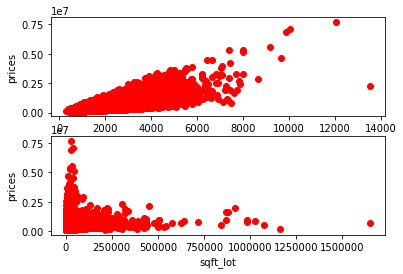

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.subplot(211)
plt.plot(sales['sqft_living'], sales['price'], 'ro')
plt.ylabel('prices')
plt.xlabel('sqft_living')

plt.subplot(212)
plt.plot(sales['sqft_lot'], sales['price'], 'ro')
plt.ylabel('prices')
plt.xlabel('sqft_lot')

# Create a simple regression model based on sqft_living as the only feature

Feature scaling and split data into training and testing sets

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sales['sqft_living_scaled'] = scaler.fit_transform(sales['sqft_living'])

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(sales, train_size = 0.8)

C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train the linear regression model using the training set

In [78]:
from sklearn.linear_model import LinearRegression
sqft_model = LinearRegression()
sqft_model.fit(train_data['sqft_living_scaled'].reshape(-1, 1), train_data['price'])

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Obtain parameters (intercept = theta0, coefficients = theta1,...)

In [79]:
print (sqft_model.intercept_)
print (sqft_model.coef_)

539498.519359
[ 256415.7048722]


Evaluate the model using mean_squared_error

In [80]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(train_data['price'], sqft_model.predict(train_data['sqft_living_scaled'].values.reshape(-1, 1)))
test_error = mean_squared_error(test_data['price'], sqft_model.predict(test_data['sqft_living_scaled'].values.reshape(-1, 1)))
print (train_error, test_error)

67629377146.8 71248969465.8


Visulize the fit

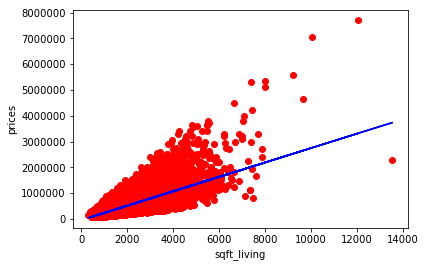

In [81]:
plt.plot(train_data['sqft_living'], train_data['price'], 'ro', 
         train_data['sqft_living'], sqft_model.predict(train_data['sqft_living_scaled'].values.reshape(-1, 1)), 'b-')
plt.ylabel('prices')
plt.xlabel('sqft_living')

# Build a regression model with more features

In [88]:
sales2 = sales.copy()
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
sales2[my_features] = scaler.fit_transform(sales2[my_features])
print (sales2.head())
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(sales2, train_size = 0.8)

           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900 -0.398737  -1.447464    -0.979835   
1  6414100192  20141209T000000  538000 -0.398737   0.175607     0.533634   
2  5631500400  20150225T000000  180000 -1.473959  -1.447464    -1.426254   
3  2487200875  20141209T000000  604000  0.676485   1.149449    -0.130550   
4  1954400510  20150218T000000  510000 -0.398737  -0.149007    -0.435422   

   sqft_lot    floors  waterfront  view         ...          sqft_above  \
0 -0.228321 -0.915427           0     0         ...                1180   
1 -0.189885  0.936506           0     0         ...                2170   
2 -0.123298 -0.915427           0     0         ...                 770   
3 -0.244014 -0.915427           0     0         ...                1050   
4 -0.169653 -0.915427           0     0         ...                1680   

   sqft_basement  yr_built  yr_renovated   zipcode      lat     long  \
0              0    

In [89]:
features_model = LinearRegression()
features_model.fit(train_data[my_features], train_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
print (features_model.intercept_)
print (features_model.coef_)

540956.961485
[ -50938.551342      7885.19569307  290325.69976931  -12221.82222932
   -1755.72402073   30174.31556434]


In [91]:
train_error = mean_squared_error(train_data['price'], features_model.predict(train_data[my_features]))
test_error = mean_squared_error(test_data['price'], features_model.predict(test_data[my_features]))
print (train_error, test_error)

64994003627.3 66812884350.0


In [92]:
print (sqft_model.predict(sales[sales['id'] == 1925069082]['sqft_living_scaled']))
print (features_model.predict(sales2[sales2['id'] == 1925069082][my_features]))
print (sales[sales['id'] == 1925069082]['price'].tolist())

[ 1254258.82975659]
[ 1264359.20839972]
[2200000]


C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# To answer quiz questions

In [64]:
sorted_price_by_zipcode = sales.groupby('zipcode')['price'].mean().sort_values(ascending = False)
sorted_price_by_zipcode.head()

zipcode
98039    2160606
98004    1355927
98040    1194230
98112    1095499
98102     901258
Name: price, dtype: int64

In [73]:
selected = sales[sales['sqft_living'] > 2000]
selected = selected [selected['sqft_living'] < 4000]
print (len(selected.index)/len(sales.index))

0.4215518437977143


In [77]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 
'sqft_lot15']
adv_features_model = LinearRegression()
adv_features_model.fit(train_data[advanced_features], train_data['price'])
my_root_error = mean_squared_error(test_data['price'], features_model.predict(test_data[my_features]))**0.5
adv_root_error = mean_squared_error(test_data['price'], adv_features_model.predict(test_data[advanced_features]))**0.5
print (my_root_error, adv_root_error)


266843.175591 211369.673288
